# Pynbody: Where's the point?

## Installing and Getting set up

In [1]:
%pip install pynbody
#install the python functions of pynbody

Note: you may need to restart the kernel to use updated packages.


In [2]:
!git clone https://github.com/pynbody/pynbody.git
#clone the github to download the code. Useful for debugging

fatal: destination path 'pynbody' already exists and is not an empty directory.


In [3]:
%pip install topsy
#import the python functions of topsy

Note: you may need to restart the kernel to use updated packages.


In [4]:
!git clone https://github.com/pynbody/topsy.git
#clone the github of topsy, note that it is under the same overall umbrella as pynbody proper

fatal: destination path 'topsy' already exists and is not an empty directory.


In [5]:
%pip install numpy
#requirement to make the packages work

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np

In [7]:
#download the test data
import pynbody.test_utils
pynbody.test_utils.precache_test_data()

In [8]:
#print the downloaded version of Pynbody
print(pynbody.__version__)

2.1.1


## Tests

In [9]:
import pynbody
import pylab
s = pynbody.load('testdata/gasoline_ahf/g15784.lr.01024.gz')
print(f"There are {len(s)} particles in this simulation")

There are 1717156 particles in this simulation


In [10]:
#Find halos
h = s.halos()

pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor


In [11]:
#Get the halo of the largest galaxy in this cluster
main_halo = h[0]

In [12]:
#print out the number of particles of each type, so number of gas particles, number of dark matter particles, and number of star particles
print('ngas = %e, ndark = %e, nstar = %e\n'%(len(main_halo.gas),len(main_halo.dark),len(main_halo.star)))
#Do the same for the entire snapshot and a different halo
print('Whole snapshot ngas = %e, ndark = %e, nstar = %e\n'%(len(s.gas),len(s.dark),len(s.star)))
print('Halo 5 ngas = %e, ndark = %e, nstar = %e\n'%(len(h[5].gas),len(h[5].dark),len(h[5].star)))

ngas = 7.906000e+04, ndark = 1.610620e+05, nstar = 2.621780e+05

Whole snapshot ngas = 1.587550e+05, ndark = 1.293231e+06, nstar = 2.651700e+05

Halo 5 ngas = 1.880000e+02, ndark = 1.009500e+04, nstar = 0.000000e+00



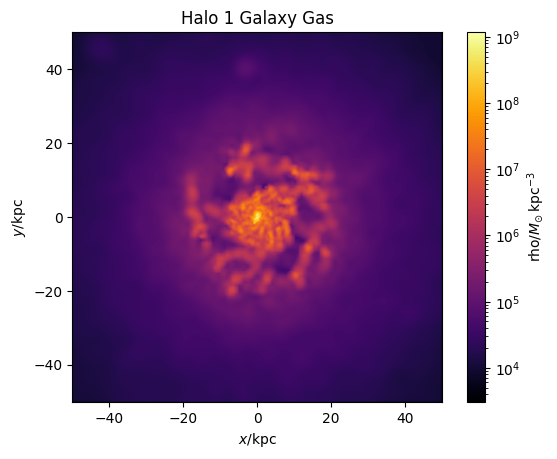

In [13]:
import matplotlib.pyplot as plt
#create an image
s.physical_units() #turn simulation space into kpc or Mpc
t = pynbody.analysis.center(main_halo) #center on the largest galaxy
image_values = pynbody.plot.image(main_halo.gas, width=100,height=100,cmap="inferno") #plot the image
plt.title("Halo 1 Galaxy Gas") #give it a title
plt.savefig("Galactic_gas.png") #save it

In [14]:
# Code to generate animation frames of the galaxy rotating, takes a while to run and produces 256 files, so it's best to keep this commented
# unless you want to create your own animation.
"""
m = pynbody.transformation.Rotation.rotate_x(t,1.0)
for i in range(365):
    pynbody.plot.image(main_halo.gas, width=100,height=100,cmap="inferno")
    plt.title("X-rotation")
    plt.savefig(str(i)+".png")
    m = pynbody.transformation.Rotation.rotate_x(m,1.0)
""";

## Topsy Turvy

In [15]:
!topsy testdata/gasoline_ahf/g15784.lr.01024.gz
#Command line usage of Topsy with a sampe dataset

Failed to create wl_display (No such file or directory)
qt.qpa.plugin: Could not load the Qt platform plugin "wayland" in "" even though it was found.
MESA: error: ZINK: failed to choose pdev
libEGL warning: egl: failed to create dri2 screen
2025-05-18 23:08:20,551 - topsy.visualizer - INFO - GPU device: CPU (llvmpipe (LLVM 17.0.6, 256 bits))
2025-05-18 23:08:20,879 - topsy.visualizer - INFO - Canvas format bgra8unorm
2025-05-18 23:08:20,879 - topsy.loader - INFO - Data filename = testdata/gasoline_ahf/g15784.lr.01024.gz, center = none, particle = dm
2025-05-18 23:08:20,888 - topsy.loader - INFO - Loading position data...
2025-05-18 23:08:21,495 - topsy.loader - INFO - Performing centering...
2025-05-18 23:08:21,665 - topsy.loader - INFO - Looking for cached smoothing data...
2025-05-18 23:08:21,673 - topsy.loader - INFO - ...success!
2025-05-18 23:08:21,674 - topsy.split_buffers - INFO - Splitting 1293231 particles into 1 buffer(s)
2025-05-18 23:08:21,691 - topsy.sph - INFO - Creating

In [16]:
#Widget technique for funning Topsy using the sample data to display gas particles
import topsy
print(topsy.__version__)
topsy.load("testdata/gasoline_ahf/g15784.lr.01024.gz", particle="gas",hdr=False);

0.6.1


RFBOutputContext()

MESA: error: ZINK: failed to choose pdev
libEGL warning: egl: failed to create dri2 screen
2025-05-18 23:08:29,345 - topsy.visualizer - INFO - GPU device: CPU (llvmpipe (LLVM 17.0.6, 256 bits))
2025-05-18 23:08:29,516 - topsy.visualizer - INFO - Canvas format rgba8unorm
2025-05-18 23:08:29,517 - topsy.loader - INFO - Data filename = testdata/gasoline_ahf/g15784.lr.01024.gz, center = none, particle = gas
2025-05-18 23:08:29,575 - topsy.loader - INFO - Loading position data...
2025-05-18 23:08:30,128 - topsy.loader - INFO - Performing centering...
2025-05-18 23:08:30,152 - topsy.loader - INFO - Looking for cached smoothing data...
2025-05-18 23:08:30,155 - topsy.loader - INFO - ...success!
2025-05-18 23:08:30,156 - topsy.split_buffers - INFO - Splitting 158755 particles into 1 buffer(s)
2025-05-18 23:08:30,174 - topsy.sph - INFO - Creating SPH renderer with resolution 1024
2025-05-18 23:08:31,374 - topsy.particle_buffers - INFO - Creating position+smoothing buffer
2025-05-18 23:08:31,381

In [17]:
#Python-Bash interface for running Topsy with gas particles
import subprocess

subprocess.run(["topsy","testdata/gasoline_ahf/g15784.lr.01024.gz", "-p","gas"]);

Failed to create wl_display (No such file or directory)
qt.qpa.plugin: Could not load the Qt platform plugin "wayland" in "" even though it was found.
MESA: error: ZINK: failed to choose pdev
libEGL warning: egl: failed to create dri2 screen
2025-05-18 23:08:33,121 - topsy.visualizer - INFO - GPU device: CPU (llvmpipe (LLVM 17.0.6, 256 bits))
2025-05-18 23:08:33,427 - topsy.visualizer - INFO - Canvas format bgra8unorm
2025-05-18 23:08:33,427 - topsy.loader - INFO - Data filename = testdata/gasoline_ahf/g15784.lr.01024.gz, center = none, particle = gas
2025-05-18 23:08:33,440 - topsy.loader - INFO - Loading position data...
2025-05-18 23:08:34,050 - topsy.loader - INFO - Performing centering...
2025-05-18 23:08:34,082 - topsy.loader - INFO - Looking for cached smoothing data...
2025-05-18 23:08:34,083 - topsy.loader - INFO - ...success!
2025-05-18 23:08:34,083 - topsy.split_buffers - INFO - Splitting 158755 particles into 1 buffer(s)
2025-05-18 23:08:34,100 - topsy.sph - INFO - Creating